<a href="https://colab.research.google.com/github/woominhee/Everyones-Deep-Learning/blob/main/ch14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14장 모델의 성능 향상시키기

### 1. 데이터의 확인과 검증셋

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv', header=None)

# 데이터 미리 보기
df

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), 460.93 KiB | 2.33 MiB/s, done.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
# 와인의 속성을 X로 와인의 분류를 y로 저장
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [3]:
# 학습셋과 테스트셋으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2 # validation_split 로 검증셋 설정

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 2s 42ms/step - loss: 2.3858 - accuracy: 0.2307 - val_loss: 1.2930 - val_accuracy: 0.2492
Epoch 2/50
8/8 [==============================] - 0

In [4]:
# 테스트 결과 출력
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9354
Test accuracy: 0.9353846311569214


## 2. 모델 업데이트하기

### 기본 코드 불러오기

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# !git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv', header=None)

X = df.iloc[:,0:12]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 모델의 저장 설정 및 실행

In [6]:
# 모델 저장의 조건 설정
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델 실행
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.8577.hdf5

Epoch 2: saving model to ./data/model/all/02-0.8654.hdf5

Epoch 3: saving model to ./data/model/all/03-0.8846.hdf5

Epoch 4: saving model to ./data/model/all/04-0.8969.hdf5

Epoch 5: saving model to ./data/model/all/05-0.9100.hdf5

Epoch 6: saving model to ./data/model/all/06-0.9262.hdf5

Epoch 7: saving model to ./data/model/all/07-0.9269.hdf5

Epoch 8: saving model to ./data/model/all/08-0.9300.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9315.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9331.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9331.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9331.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9331.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9331.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9315.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9331.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9323.hdf5

Epoch

In [7]:
# 테스트 결과 출력
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9515
Test accuracy: 0.9515384435653687


## 3. 그래프로 과적합 확인하기

In [8]:
# 그래프 확인을 위한 긴 학습 
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1409 - accuracy: 0.9520 - val_loss: 0.1628 - val_accuracy: 0.9369
Epoch 2/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1360 - accuracy: 0.9497 - val_loss: 0.1581 - val_accuracy: 0.9377
Epoch 3/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1329 - accuracy: 0.9510 - val_loss: 0.1557 - val_accuracy: 0.9377
Epoch 4/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1294 - accuracy: 0.9515 - val_loss: 0.1532 - val_accuracy: 0.9369
Epoch 5/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1271 - accuracy: 0.9530 - val_loss: 0.1544 - val_accuracy: 0.9392
Epoch 6/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1255 - accuracy: 0.9530 - val_loss: 0.1502 - val_accuracy: 0.9362
Epoch 7/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1236 - accuracy: 0.9541 - val_loss: 0.1482 - val_accuracy: 0.9385
Epoch 8/2000
8/8 [

In [9]:
# history에 저장된 학습 결과 확인
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.140915,0.952014,0.162762,0.936923
1,0.136008,0.949705,0.158092,0.937692
2,0.132867,0.950988,0.155653,0.937692
3,0.129408,0.951501,0.153188,0.936923
4,0.127095,0.953041,0.154404,0.939231
...,...,...,...,...
1995,0.020744,0.994098,0.070181,0.992308
1996,0.021141,0.994098,0.076109,0.990769
1997,0.021027,0.995124,0.072111,0.992308
1998,0.023201,0.993072,0.072991,0.989231


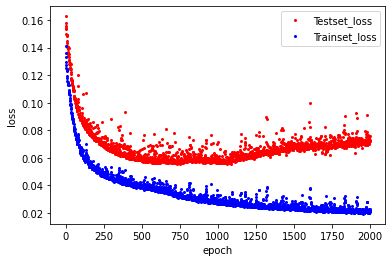

In [10]:
# y_vloss에 테스트셋(검증셋)의 오차를 저장
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장
y_loss=hist_df['loss']

# x값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 4. 학습의 자동 중단

### 기본 코드 불러오기

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# !git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv', header=None)

X = df.iloc[:,0:12]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 학습의 자동 중단 및 최적화 모델 저장

In [12]:
# 학습이 언제 자동 중단될지 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20) # 검증셋의 오차가 20번 이상 낮아지지 않을 경우 학습 종료

# 최적화 모델이 저장될 폴더와 모델의 이름을 정한다.
modelpath="./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 모델 실행
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
8/8 [==============================] - 1s 39ms/step - loss: 37.5770 - accuracy: 0.2443 - val_loss: 30.8980 - val_accuracy: 0.2431
Epoch 2/2000
8/8 [==============================] - 0s 11ms/step - loss: 27.1043 - accuracy: 0.2443 - val_loss: 21.3166 - val_accuracy: 0.2431
Epoch 3/2000
8/8 [==============================] - 0s 13ms/step - loss: 18.3677 - accuracy: 0.2443 - val_loss: 14.5840 - val_accuracy: 0.2431
Epoch 4/2000
8/8 [==============================] - 0s 14ms/step - loss: 12.5456 - accuracy: 0.2443 - val_loss: 9.1835 - val_accuracy: 0.2431
Epoch 5/2000
8/8 [==============================] - 0s 15ms/step - loss: 7.8409 - accuracy: 0.2443 - val_loss: 6.1354 - val_accuracy: 0.2431
Epoch 6/2000
8/8 [==============================] - 0s 11ms/step - loss: 5.4761 - accuracy: 0.2443 - val_loss: 4.5854 - val_accuracy: 0.2431
Epoch 7/2000
8/8 [==============================] - 0s 13ms/step - loss: 4.1700 - accuracy: 0.2443 - val_loss: 3.4738 - val_accuracy: 0.2431
Epoch 

In [13]:
# 테스트 결과 출력
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9892
Test accuracy: 0.989230751991272
